<a href="https://colab.research.google.com/github/jmend01/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Jonathan%20Mendoza%20DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

### Import libraries, load & validate dataframe, update header names

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pandas==0.23.4 #downgrade pandas for functinality on crosstab

col_names = ['operation_age','operation_year','axillary_nodes','survival_status']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header = None, names = col_names )

df.head()

,operation_age,operation_year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
print(df.shape)
print(df.survival_status.value_counts())
df.isna().sum()

(306, 4)
1    225
2     81
Name: survival_status, dtype: int64


operation_age      0
operation_year     0
axillary_nodes     0
survival_status    0
dtype: int64

verified no NaN values present, checked data values for next operation

In [3]:
df['survival_status'] = np.where(df['survival_status']==1, 1, 0)
print(df.survival_status.value_counts())
df.head()

1    225
0     81
Name: survival_status, dtype: int64


,operation_age,operation_year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


changed values under survival_status to conform with a 0/1 standard

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

### Figure 1

(49, 59]    99
(39, 49]    84
(59, 69]    62
(29, 39]    40
(69, 85]    21
Name: operation_age, dtype: int64


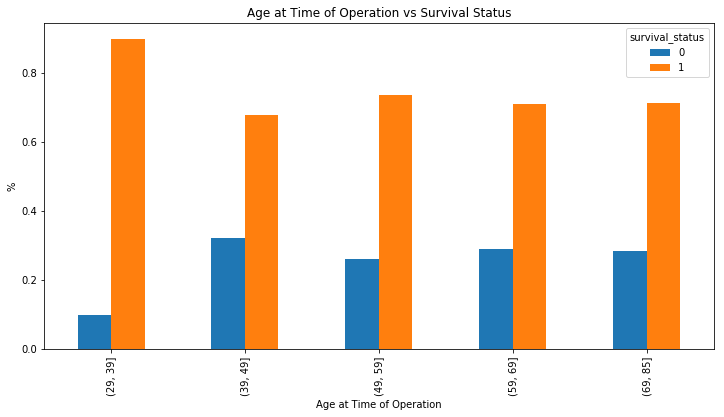

survival_status,0,1
operation_age,,
"(29, 39]",0.100000,0.900000
"(39, 49]",0.321429,0.678571
"(49, 59]",0.262626,0.737374
"(59, 69]",0.290323,0.709677
"(69, 85]",0.285714,0.714286


In [5]:
age_bins = pd.cut(df['operation_age'], [29,39,49,59,69,85])

print(age_bins.value_counts())

pd.crosstab(age_bins, df['survival_status'], normalize = 'index').plot.bar(figsize = (12,6))
plt.xlabel('Age at Time of Operation')
plt.ylabel('%')
plt.title('Age at Time of Operation vs Survival Status')
plt.show()
pd.crosstab(age_bins, df['survival_status'],normalize = 'index')



if you get the operation before age 40, you are more likely to survive past year 5 from the operation date.

### Figure 2

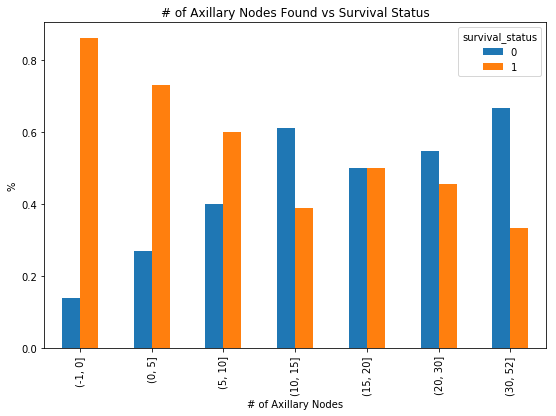

survival_status,0,1
axillary_nodes,,
"(-1, 0]",0.139706,0.860294
"(0, 5]",0.270000,0.730000
"(5, 10]",0.400000,0.600000
"(10, 15]",0.611111,0.388889
"(15, 20]",0.500000,0.500000
"(20, 30]",0.545455,0.454545
"(30, 52]",0.666667,0.333333


In [7]:
ax_bins = pd.cut(df['axillary_nodes'], [-1,0,5,10,15,20,30,52])
pd.crosstab(ax_bins,df['survival_status'], normalize = 'index').plot.bar(figsize = (9,6))
plt.xlabel('# of Axillary Nodes')
plt.ylabel('%')
plt.title('# of Axillary Nodes Found vs Survival Status')
plt.show()
pd.crosstab(ax_bins,df['survival_status'], normalize = 'index')

if no axillary nodes are found then survival beyond year 5 is more likely. There is an inverse relationship between the number of nodes and suvival status

### Figure 3

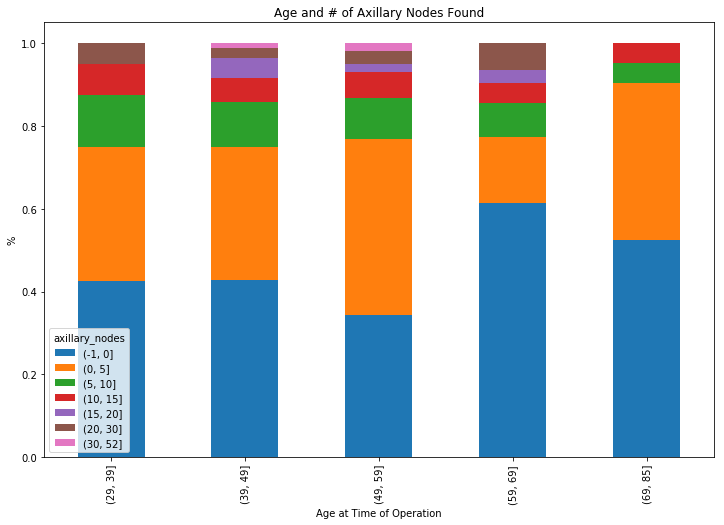

axillary_nodes,"(-1, 0]","(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 30]","(30, 52]"
operation_age,,,,,,,
"(29, 39]",0.425000,0.325000,0.125000,0.075000,0.000000,0.050000,0.000000
"(39, 49]",0.428571,0.321429,0.107143,0.059524,0.047619,0.023810,0.011905
"(49, 59]",0.343434,0.424242,0.101010,0.060606,0.020202,0.030303,0.020202
"(59, 69]",0.612903,0.161290,0.080645,0.048387,0.032258,0.064516,0.000000
"(69, 85]",0.523810,0.380952,0.047619,0.047619,0.000000,0.000000,0.000000


In [13]:
pd.crosstab(age_bins, ax_bins,normalize = 'index').plot.bar(figsize = (12,8), stacked = True)
plt.xlabel('Age at Time of Operation')
plt.ylabel('%')
plt.title('Age and # of Axillary Nodes Found')
plt.show()
pd.crosstab(age_bins, ax_bins,normalize = 'index')

positive correlation between age and number of axillary nodes found

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Figure 2 shows a positive correlation between # of axillary nodes detected and survival of less than 5 years.

Figure 1 shows there is a negative relationship between age and survival of more than 5 years.

Figure 3 shows that with increased age there were more axillary nodes detected and those people were less likely to survive past year 5

